In [44]:
import json

megadetect = {}

with open('metadata/iwildcam2022_mdv4_detections.json') as f:
	megadetect = json.load(f)

df_detect = pd.DataFrame(megadetect['images'])

def extract_img(img_id):
	img = mpimg.imread('data/train/'+img_id+'.jpg')
	detects = df_detect[df_detect['file']=='train/'+img_id].detections.tolist()
	
	if(len(detects)>0 and detects!=[[]]):
		for idx,detect in enumerate(detects[0]):
                x0,y0,w0,h0=detect['bbox']    
                H,W,_=img.shape
                if w0*W>100 and h0*H>100:           
                    x=math.floor(x0*W)
                    y=math.floor(y0*H)
                    w=math.floor(w0*W)
                    h=math.floor(h0*H)
                    obj=img[int(y):int(y+h),int(x):int(x+w)]
                    obj1 = Image.fromarray(np.uint8(obj))
                    obj2 = np.asarray(obj1.resize((32,32))) 
                    objects.append(obj2/255.0)
                    objlabels.append(name)
                    if show:
                        _ = plt.figure(figsize=(3,3))
                        _ = plt.xticks([])
                        _ = plt.yticks([])
                        _ = plt.imshow(obj)
	return None


,file,max_detection_conf,detections
261423,train/913ed090-21bc-11ea-a13a-137349068a90.jpg,0.000,[]
261424,train/915dbc6c-21bc-11ea-a13a-137349068a90.jpg,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0..."
261425,train/90cf2d76-21bc-11ea-a13a-137349068a90.jpg,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.0..."
261426,train/8bfae7f4-21bc-11ea-a13a-137349068a90.jpg,0.000,[]
261427,train/978ba5a4-21bc-11ea-a13a-137349068a90.jpg,0.999,"[{'category': '1', 'conf': 0.999, 'bbox': [0.3..."


<AxesSubplot:>

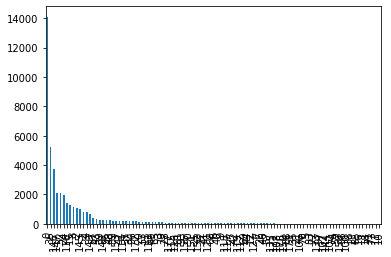

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('metadata.csv')

# plot the most common 20 categories
# data['y'].value_counts().head(5).plot(kind='bar')

# filter out y=0
# data = data[data['y'] != 0]

# save only the best 20 categories in a new file withouth the most common category
# data = data.loc[data['y'].isin(data['y'].value_counts().head(15).index), :]

data.loc[data['split'] == 'test', 'y'].value_counts()
# data.loc[data['split'] == 'train', 'y'].value_counts().head(15)
# save train split
# data.loc[data['split']=='val', :].to_csv('val.csv', index=False)
# data.loc[data['split']=='train', :].to_csv('train.csv', index=False)
# data.loc[data['split']=='test', :].to_csv('test.csv', index=False)

In [ ]:
# make a train set that has equal number of samples per class
train_data = pd.read_csv('train.csv')
min_samples = train_data['y'].value_counts().min()
train_data = train_data.groupby('y').apply(lambda x: x.sample(min_samples))

train_data['y'].value_counts().plot(kind='bar')
train_data.to_csv('train_balanced.csv', index=False)

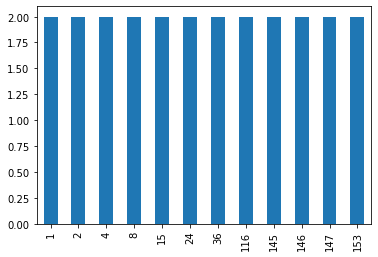

In [29]:
# make a train set that has equal number of samples per class
test_data = pd.read_csv('test.csv')
min_samples = test_data['y'].value_counts().min()
test_data = test_data.groupby('y').apply(lambda x: x.sample(min_samples))

test_data['y'].value_counts().plot(kind='bar')
test_data.to_csv('test_balanced.csv', index=False)

<AxesSubplot:>

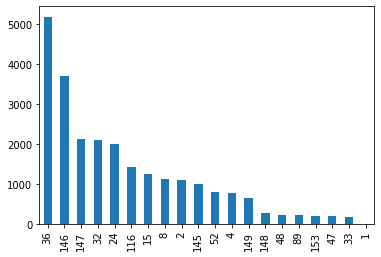

In [12]:
data = pd.read_csv('test.csv')
data['y'].value_counts().plot(kind='bar')